In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

from realx import REALX

# Load Data

In [2]:
#%% Parameters
# MNIST    
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

input_shape = x_train.shape[1]

# Set Training Parameters

In [3]:
lamda = 5.
epochs = 500
batch_size = 1000
optimizer = Adam(1e-4)
loss = 'categorical_crossentropy'
metrics = ['acc', 'AUC']

# Create Selector Architecture

In [4]:
model_input = Input(shape=(input_shape,), dtype='float32')
out = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(model_input)
out = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(out)
select_prob = Dense(input_shape, kernel_regularizer=regularizers.l2(1e-3))(out)

selector_model = Model(model_input, select_prob)

# Create Predictor Architecture

In [5]:
model_input = Input(shape=(input_shape,), dtype='float32')
out= Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(model_input)
out = BatchNormalization()(out)
out= Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(out)
out = BatchNormalization()(out)
prob = Dense(num_classes, activation ='softmax', kernel_regularizer=regularizers.l2(1e-3))(out)

predictor_model = Model(model_input, prob)

# Initialize REAL-X

In [6]:
realx = REALX(selector_model, predictor_model, lamda)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 784)          0           flatten[0][0]                    
__________________________________________________________________________________________________
random__bernoulli__sampler (Ran (None, None)         0           lambda[0][0]                     
____________________________________________________________________________________________

# Train the REAL-X Predictor

In [7]:
realx.predictor.compile(loss=loss,
                        optimizer=optimizer,
                        metrics=metrics)
realx.predictor.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)

Epoch 1/500
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
60/60 [==============================] - 1s 9ms/step - loss: 2.3294 - acc: 0.4051 - auc: 0.8022
Epoch 2/500
60/60 [==============================] - 1s 9ms/step - loss: 1.4793 - acc: 0.6844 - auc: 0.9453
Epoch 3/500
60/60 [==============================] - 1s 9ms/step - loss: 1.2275 - acc: 0.7674 - auc: 0.9678
Epoch 4/500
60/60 [==============================] - 1s 8ms/step - loss: 1.0964 - acc: 0.8046 - auc: 0.9764
Epoch 5/500
60/60 [==============================] - 0s 8ms/step - loss: 1.0141 - acc: 0.8291 - auc: 0.9805
Epoch 6/500
60/60 [==============================] - 1s 9ms/step - loss: 0.9500 - acc: 0.8458 - auc: 0.9835
Epoch 7/500
60/60 [==============================] - 1s 9ms/step - loss: 0.9004 - acc: 0.8563 - auc: 0.9857
Epoch 8/500
60/60 [==============================] - 1s 9ms/step - loss: 0.8581 - acc: 0.8656 - auc: 0.9873
Epoch 9/500
60/60 [==============================] - 1s

60/60 [==============================] - 1s 9ms/step - loss: 0.1263 - acc: 0.9808 - auc: 0.9997
Epoch 147/500
60/60 [==============================] - 1s 10ms/step - loss: 0.1261 - acc: 0.9810 - auc: 0.9996
Epoch 148/500
60/60 [==============================] - 1s 8ms/step - loss: 0.1232 - acc: 0.9818 - auc: 0.9996
Epoch 149/500
60/60 [==============================] - 1s 9ms/step - loss: 0.1261 - acc: 0.9803 - auc: 0.9996
Epoch 150/500
60/60 [==============================] - 1s 9ms/step - loss: 0.1215 - acc: 0.9824 - auc: 0.9997
Epoch 151/500
60/60 [==============================] - 1s 9ms/step - loss: 0.1233 - acc: 0.9806 - auc: 0.9997
Epoch 152/500
60/60 [==============================] - 1s 10ms/step - loss: 0.1218 - acc: 0.9814 - auc: 0.9997
Epoch 153/500
60/60 [==============================] - 0s 8ms/step - loss: 0.1213 - acc: 0.9816 - auc: 0.9997
Epoch 154/500
60/60 [==============================] - 1s 10ms/step - loss: 0.1210 - acc: 0.9811 - auc: 0.9996
Epoch 155/500
60/60 [

60/60 [==============================] - 1s 9ms/step - loss: 0.0690 - acc: 0.9884 - auc: 0.9998
Epoch 295/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0678 - acc: 0.9889 - auc: 0.9999
Epoch 296/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0685 - acc: 0.9888 - auc: 0.9998
Epoch 297/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0676 - acc: 0.9886 - auc: 0.9999
Epoch 298/500
60/60 [==============================] - 1s 8ms/step - loss: 0.0665 - acc: 0.9887 - auc: 0.9999
Epoch 299/500
60/60 [==============================] - 1s 10ms/step - loss: 0.0682 - acc: 0.9887 - auc: 0.9998
Epoch 300/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0668 - acc: 0.9893 - auc: 0.9999
Epoch 301/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0673 - acc: 0.9889 - auc: 0.9999
Epoch 302/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0677 - acc: 0.9890 - auc: 0.9998
Epoch 303/500
60/60 [==

60/60 [==============================] - 1s 10ms/step - loss: 0.0530 - acc: 0.9911 - auc: 0.9999
Epoch 443/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0553 - acc: 0.9904 - auc: 0.9999
Epoch 444/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0529 - acc: 0.9912 - auc: 0.9999
Epoch 445/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0539 - acc: 0.9910 - auc: 0.9999
Epoch 446/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0536 - acc: 0.9913 - auc: 0.9999
Epoch 447/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0531 - acc: 0.9911 - auc: 0.9999
Epoch 448/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0537 - acc: 0.9906 - auc: 0.9999
Epoch 449/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0548 - acc: 0.9910 - auc: 0.9999
Epoch 450/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0545 - acc: 0.9907 - auc: 0.9999
Epoch 451/500
60/60 [==

# Train the REAL-X Selector

In [8]:
# Build the Selector
realx.build_selector()

Selector Built!


In [9]:
# Train
realx.selector.compile(loss=None,
                       optimizer=optimizer,
                       metrics=metrics)
realx.selector.fit(x_train,
                   y_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   verbose=1)

Epoch 1/500
60/60 [==============================] - 1s 15ms/step - loss: -1.3925 - sel%: 0.2442 - acc: 0.9456 - auc: 0.9975
Epoch 2/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5990 - sel%: 0.0900 - acc: 0.9561 - auc: 0.9983
Epoch 3/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5363 - sel%: 0.0808 - acc: 0.9624 - auc: 0.9989
Epoch 4/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5198 - sel%: 0.0778 - acc: 0.9637 - auc: 0.9989
Epoch 5/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5128 - sel%: 0.0754 - acc: 0.9633 - auc: 0.9988
Epoch 6/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5085 - sel%: 0.0751 - acc: 0.9639 - auc: 0.9989
Epoch 7/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5074 - sel%: 0.0752 - acc: 0.9641 - auc: 0.9989
Epoch 8/500
60/60 [==============================] - 1s 14ms/step - loss: -0.5044 - sel%: 0.0753 - acc: 0.9650 - auc: 0.9990


60/60 [==============================] - 1s 14ms/step - loss: -0.3962 - sel%: 0.0591 - acc: 0.9727 - auc: 0.9995
Epoch 127/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3954 - sel%: 0.0593 - acc: 0.9737 - auc: 0.9994
Epoch 128/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3953 - sel%: 0.0596 - acc: 0.9744 - auc: 0.9994
Epoch 129/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3941 - sel%: 0.0594 - acc: 0.9737 - auc: 0.9995
Epoch 130/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3947 - sel%: 0.0592 - acc: 0.9733 - auc: 0.9995
Epoch 131/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3947 - sel%: 0.0588 - acc: 0.9729 - auc: 0.9994
Epoch 132/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3932 - sel%: 0.0589 - acc: 0.9737 - auc: 0.9994
Epoch 133/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3934 - sel%: 0.0588 - acc: 0.9733 - auc: 0.999

60/60 [==============================] - 1s 14ms/step - loss: -0.3477 - sel%: 0.0522 - acc: 0.9766 - auc: 0.9996
Epoch 255/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3480 - sel%: 0.0516 - acc: 0.9759 - auc: 0.9995
Epoch 256/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3478 - sel%: 0.0517 - acc: 0.9763 - auc: 0.9996
Epoch 257/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3480 - sel%: 0.0518 - acc: 0.9762 - auc: 0.9995
Epoch 258/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3478 - sel%: 0.0515 - acc: 0.9754 - auc: 0.9995
Epoch 259/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3468 - sel%: 0.0513 - acc: 0.9755 - auc: 0.9996
Epoch 260/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3466 - sel%: 0.0512 - acc: 0.9756 - auc: 0.9995
Epoch 261/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3454 - sel%: 0.0506 - acc: 0.9753 - auc: 0.999

60/60 [==============================] - 1s 14ms/step - loss: -0.3129 - sel%: 0.0454 - acc: 0.9776 - auc: 0.9996
Epoch 383/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3117 - sel%: 0.0452 - acc: 0.9772 - auc: 0.9996
Epoch 384/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3120 - sel%: 0.0446 - acc: 0.9768 - auc: 0.9996
Epoch 385/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3126 - sel%: 0.0448 - acc: 0.9769 - auc: 0.9996
Epoch 386/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3110 - sel%: 0.0448 - acc: 0.9776 - auc: 0.9996
Epoch 387/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3107 - sel%: 0.0450 - acc: 0.9776 - auc: 0.9996
Epoch 388/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3118 - sel%: 0.0449 - acc: 0.9775 - auc: 0.9995
Epoch 389/500
60/60 [==============================] - 1s 14ms/step - loss: -0.3114 - sel%: 0.0452 - acc: 0.9778 - auc: 0.999

# Plot Explainations

In [10]:
import matplotlib.pyplot as plt

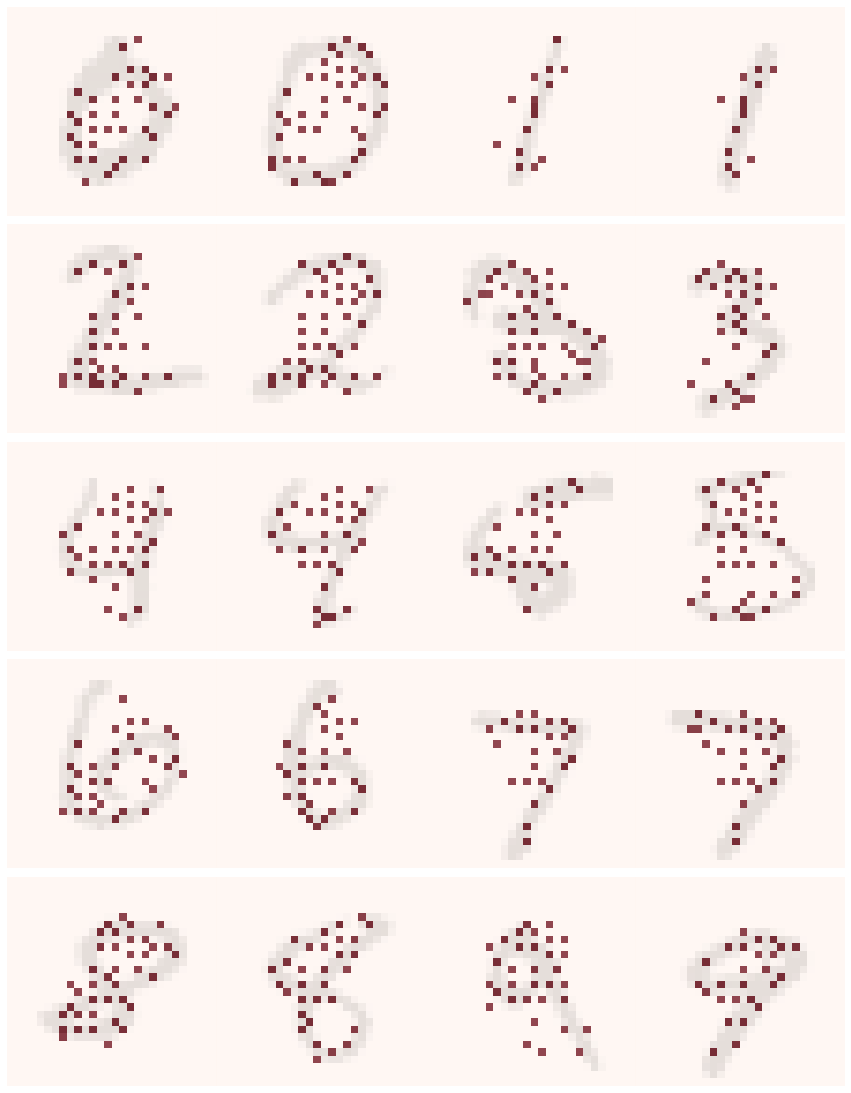

In [11]:
#1. Get Selections 
score = realx.select(x_test, batch_size, True)

#2. Get Predictions
y_score = realx.predict(x_test, batch_size)
y_pred = y_score.argmax(1)
y_test_num = y_test.argmax(1)

#2. Plot Selections
fig = plt.figure(figsize=(15,20))    
j = 1
for num in range(10):
    for i in np.where(y_test_num==num)[0][:2]:
        ax = fig.add_subplot(5,4, j)
        ax.imshow(score[i,:].reshape((28,28)), cmap= 'Reds', alpha = 0.8)
        ax.imshow(x_test[i,:].reshape((28,28)), alpha = 0.1, cmap = 'Greys')
        ax.set_axis_off()
        j+=1

fig.subplots_adjust(wspace=0, hspace=0)

# Train EVAL-X

In [12]:
realx.evalx.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=metrics)
realx.evalx.fit(x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                verbose=1)

Epoch 1/500
60/60 [==============================] - 1s 9ms/step - loss: 1.4442 - acc: 0.6928 - auc: 0.9445
Epoch 2/500
60/60 [==============================] - 1s 9ms/step - loss: 0.8886 - acc: 0.8584 - auc: 0.9860
Epoch 3/500
60/60 [==============================] - 1s 9ms/step - loss: 0.7833 - acc: 0.8830 - auc: 0.9900
Epoch 4/500
60/60 [==============================] - 1s 8ms/step - loss: 0.7246 - acc: 0.8972 - auc: 0.9917
Epoch 5/500
60/60 [==============================] - 1s 9ms/step - loss: 0.6782 - acc: 0.9057 - auc: 0.9929
Epoch 6/500
60/60 [==============================] - 1s 9ms/step - loss: 0.6427 - acc: 0.9137 - auc: 0.9938
Epoch 7/500
60/60 [==============================] - 1s 9ms/step - loss: 0.6186 - acc: 0.9160 - auc: 0.9943
Epoch 8/500
60/60 [==============================] - 1s 9ms/step - loss: 0.5904 - acc: 0.9226 - auc: 0.9949
Epoch 9/500
60/60 [==============================] - 1s 8ms/step - loss: 0.5683 - acc: 0.9272 - auc: 0.9954
Epoch 10/500
60/60 [========

60/60 [==============================] - 0s 8ms/step - loss: 0.1867 - acc: 0.9740 - auc: 0.9993
Epoch 77/500
60/60 [==============================] - 1s 11ms/step - loss: 0.1836 - acc: 0.9747 - auc: 0.9993
Epoch 78/500
60/60 [==============================] - 1s 8ms/step - loss: 0.1853 - acc: 0.9729 - auc: 0.9993
Epoch 79/500
60/60 [==============================] - 0s 8ms/step - loss: 0.1805 - acc: 0.9748 - auc: 0.9994
Epoch 80/500
60/60 [==============================] - 0s 8ms/step - loss: 0.1801 - acc: 0.9745 - auc: 0.9994
Epoch 81/500
60/60 [==============================] - 1s 10ms/step - loss: 0.1766 - acc: 0.9758 - auc: 0.9993
Epoch 82/500
60/60 [==============================] - 1s 8ms/step - loss: 0.1784 - acc: 0.9737 - auc: 0.9993
Epoch 83/500
60/60 [==============================] - 1s 10ms/step - loss: 0.1743 - acc: 0.9754 - auc: 0.9994
Epoch 84/500
60/60 [==============================] - 0s 8ms/step - loss: 0.1733 - acc: 0.9750 - auc: 0.9994
Epoch 85/500
60/60 [=========

60/60 [==============================] - 1s 8ms/step - loss: 0.0787 - acc: 0.9867 - auc: 0.9998
Epoch 225/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0765 - acc: 0.9879 - auc: 0.9999
Epoch 226/500
60/60 [==============================] - 1s 8ms/step - loss: 0.0764 - acc: 0.9872 - auc: 0.9998
Epoch 227/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0767 - acc: 0.9875 - auc: 0.9998
Epoch 228/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0751 - acc: 0.9877 - auc: 0.9998
Epoch 229/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0748 - acc: 0.9874 - auc: 0.9998
Epoch 230/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0761 - acc: 0.9873 - auc: 0.9998
Epoch 231/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0735 - acc: 0.9886 - auc: 0.9999
Epoch 232/500
60/60 [==============================] - 1s 10ms/step - loss: 0.0727 - acc: 0.9886 - auc: 0.9999
Epoch 233/500
60/60 [==

60/60 [==============================] - 1s 9ms/step - loss: 0.0562 - acc: 0.9909 - auc: 0.9999
Epoch 373/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0559 - acc: 0.9905 - auc: 0.9999
Epoch 374/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0575 - acc: 0.9900 - auc: 0.9999
Epoch 375/500
60/60 [==============================] - 1s 10ms/step - loss: 0.0572 - acc: 0.9904 - auc: 0.9999
Epoch 376/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0534 - acc: 0.9916 - auc: 0.9999
Epoch 377/500
60/60 [==============================] - 1s 8ms/step - loss: 0.0555 - acc: 0.9905 - auc: 0.9999
Epoch 378/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0575 - acc: 0.9899 - auc: 0.9999
Epoch 379/500
60/60 [==============================] - 0s 8ms/step - loss: 0.0566 - acc: 0.9904 - auc: 0.9999
Epoch 380/500
60/60 [==============================] - 1s 9ms/step - loss: 0.0566 - acc: 0.9904 - auc: 0.9999
Epoch 381/500
60/60 [==

# EVAL-X Evaluation

In [13]:
from sklearn.metrics import roc_auc_score, accuracy_score, average_precision_score

In [14]:
ey_score = realx.evaluate(x_test, batch_size)
y_score = realx.predict(x_test, batch_size)

#Get Results
### ROC
AUROC = roc_auc_score(y_test, y_score, 'micro')
eAUROC = roc_auc_score(y_test, ey_score, 'micro')
### PRC
AUPRC = average_precision_score(y_test, y_score, 'micro')
eAUPRC = average_precision_score(y_test, ey_score, 'micro')

## b) Compute Accuracy
ACC = accuracy_score(y_test.argmax(1), y_score.argmax(1))
eACC = accuracy_score(y_test.argmax(1), ey_score.argmax(1))

print('REAL-X: ACC:{}, AUROC:{}, AUPRC:{}'.format(ACC, AUROC, AUPRC))
print('EVAL-X: eACC:{}, eAUROC:{}, eAUPRC:{}'.format(eACC, eAUROC, eAUPRC))

REAL-X: ACC:0.9713, AUROC:0.9990713405555556, AUPRC:0.9940232888389957
EVAL-X: eACC:0.9404, eAUROC:0.9974457355555557, eAUPRC:0.9835009266679966
